# Karim's Analysis of NYPD Shooting Incidents in New York City

-------------

*Summary:*

The dataset is about shooting incidents that happened in New York City. I will be analyzing several different aspects of the data including regional data, temporal changes in Incident Count, and risk of being deceased. This dataset can aid in answering several important questions about shootings in New York City and give insights on how to reduce them. 

Step 1: First I will import the necessary libraries and the dataset into the Jupyter notebook, which is in CSV format.

This dataset will be imported as a pandas DataFrame.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_url = 'https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD'
missing_values = [np.nan, '(null)', 'UNKNOWN']
df = pd.read_csv(df_url, na_values=missing_values)

I have included a list called `missing_values` to specify the null values in the dataset as some values are empty and some are written as '(null)' or 'UNKNOWN'.

Step 2: I will begin cleaning the data. To do this, we will first get an idea of where the missing values are using the code below.

In [4]:
print(df.shape)
df.isnull().sum()

(27312, 21)


INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              15954
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP             13132
PERP_SEX                    9950
PERP_RACE                  11786
VIC_AGE_GROUP                 61
VIC_SEX                        0
VIC_RACE                      66
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

As we can see, there are several missing values in different columns. I will execute the code below to clean the data.

In [5]:
df.drop(columns='LOC_OF_OCCUR_DESC', inplace=True)
df.drop(columns='LOC_CLASSFCTN_DESC', inplace=True)
df.dropna(inplace=True)

We can now see that there are no missing values within the dataset as the function defined above has cleaned all the data. I have removed the 'LOC_OF_OCCUR_DESC' and 'LOC_CLASSFCTN_DESC' columns as they had 25596 missing values in those columns out of the 27312 rows in the dataframe, so these columns can be removed as they serve no purpose to generate further insights. 

I have also removed the rows with missing values of 'PERP_AGE_GROUP', 'Latitude', 'LOCATION_DESC', & 'JURISDICTION_CODE', 'Longitude', & 'Lon_Lat' in order to generate a dataset with no missing values which is ready to process, which `df.dropna(inplace=True)` takes care of as empty values were defined in the `missing_values` list above.

As seen below there are now no missing values in any of the columns. 

I have also used `inplace=True` for all drop methods above to modify the original dataframe instead of creating a new instance of `df` each time.

In [6]:
df.isnull().sum()

INCIDENT_KEY               0
OCCUR_DATE                 0
OCCUR_TIME                 0
BORO                       0
PRECINCT                   0
JURISDICTION_CODE          0
LOCATION_DESC              0
STATISTICAL_MURDER_FLAG    0
PERP_AGE_GROUP             0
PERP_SEX                   0
PERP_RACE                  0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
X_COORD_CD                 0
Y_COORD_CD                 0
Latitude                   0
Longitude                  0
Lon_Lat                    0
dtype: int64

Step 3: Now that the data is cleaned, we can move on to analyzing this data and generating plots that can visualize these analyses.

I will aim to answer the following three questions using our data:

1. Has COVID-19 caused shooting incidents to increase between years 2019 - 2022 as funding was increased to fight the pandemic rather than funding policing?

2. The Bronx is notoriously known to have the highest crime rates, however is it true that the most shootings occur there?


3. The police department in New York City keeps records of how old the victims are. Is it true that victims of a higher age group are more at risk to be deceased by shootings?

1. Has COVID-19 caused shooting incidents to increase between years 2019 - 2022 as funding was increased to fight the pandemic rather than funding policing?



First I will adjust the 'OCCUR_DATE' column to datetime format using the datetime library and renaming the size column to 'Incident Count'.

In [7]:
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'])
occur_date = df.groupby(df['OCCUR_DATE'].dt.year).size()
occur_date = occur_date.reset_index(name='Incident Count')

I will then make a scatter plot to display this relationship and set the x-axis to only show the years of interest.

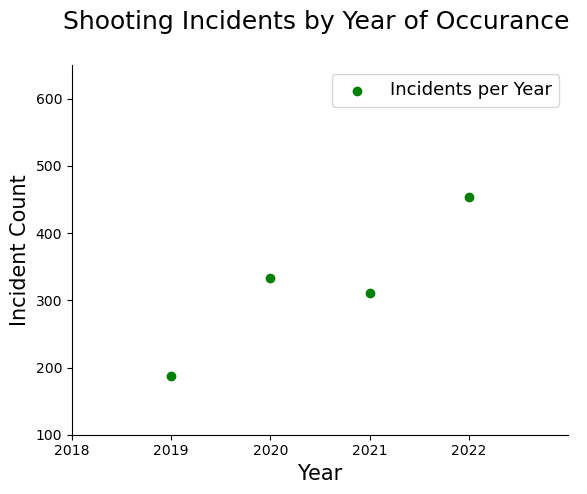

In [8]:
plt.scatter(occur_date['OCCUR_DATE'][-1:-5:-1], occur_date['Incident Count'][-1:-5:-1], color='g')

plt.title('Shooting Incidents by Year of Occurance \n', fontsize = 18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Incident Count', fontsize=15)
plt.ylim(100, 650)
plt.xticks(np.arange(min(occur_date['OCCUR_DATE']), max(occur_date['OCCUR_DATE'])+1, 1))
plt.xlim(2018, 2023)

plt.legend(['Incidents per Year'], loc='upper right',frameon=True, fontsize=13)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

Next, I will implement a regression line to display the trend of the data, which can give further ability to understand where shooting incidents might head in the following year.

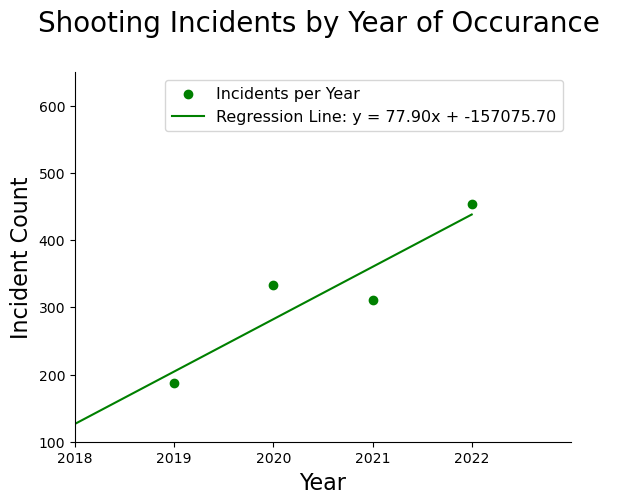

In [9]:
plt.scatter(occur_date['OCCUR_DATE'][-1:-5:-1], occur_date['Incident Count'][-1:-5:-1], color='g')
m, b = np.polyfit(occur_date['OCCUR_DATE'][-1:-5:-1], occur_date['Incident Count'][-1:-5:-1], 1)
plt.plot(occur_date['OCCUR_DATE'], m*occur_date['OCCUR_DATE'] + b, color='g')

plt.title('Shooting Incidents by Year of Occurance \n', fontsize = 20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Incident Count', fontsize=16)
plt.ylim(100, 650)
plt.xticks(np.arange(min(occur_date['OCCUR_DATE']), max(occur_date['OCCUR_DATE'])+1, 1))
plt.xlim(2018, 2023)

plt.legend(['Incidents per Year', 'Regression Line: y = {:.2f}x + {:.2f}'.format(m, b)], loc='upper right',frameon=True, fontsize=11.5)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

It is clearly displayed by the individual points and the regression line that the crime rate has risen since 2019, which is in-line with the hypothesis that it would increase due to less funding of the policing program and rather using this money to expedite the COVID-19 vaccine reseach. The regression can aid in understanding the rate of this increase, which was about 77.9 shootings per year. It can also help with predicting future shooting counts by extrapolating the regression.

2. The Bronx is notoriously known to have the highest crime rates, however is it true that the most shootings occur there?

First I will start by grouping the dataframe by the column label 'BORO' and assigning it to a variable named `boro`. We will also rename the second column 'Incident Count'.

In [10]:
boro = df.groupby('BORO').size()
boro = boro.reset_index(name='Incident Count')
boro

,BORO,Incident Count
0,BRONX,1795
1,BROOKLYN,2332
2,MANHATTAN,968
3,QUEENS,891
4,STATEN ISLAND,255


Now that `boro` is a DataFrame with the values 'BORO' and 'Incident Count', I can construct a plot that will display the results of how many shootings occur in each region.

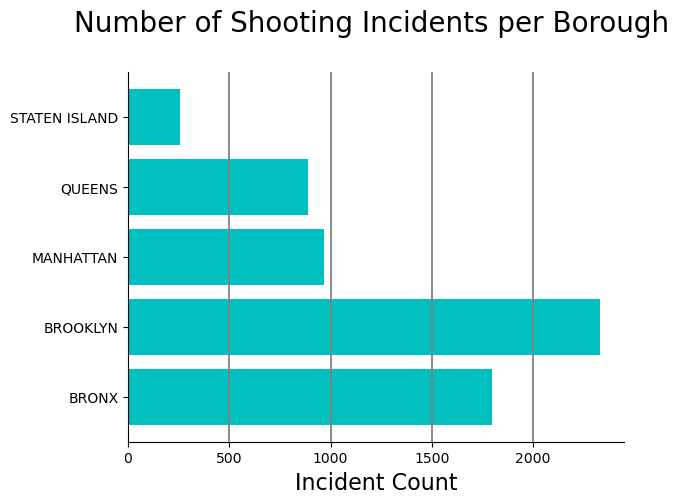

In [11]:
plt.barh(boro['BORO'], boro['Incident Count'], color='c')
plt.title('Number of Shooting Incidents per Borough \n', fontsize=20)
plt.xlabel('Incident Count', fontsize=16)
#plt.ylabel('Borough', fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(color = '#808080', axis='x', linewidth=1.3)

This bar graph shows that Brooklyn actually has more shooting incidents than the Bronx, even though the Bronx is the most known as dangerous and has the highest crime rate of any borough in New York City. This can be logically explained by the fact that Brooklyn has a higher population than the Bronx and naturally more shootings can occur there.

3. The police department in New York City keeps records of how old the victims are. Is it true that victims of a higher age group are more at risk to be deceased by shootings?

To answer this, I will look at two categories in the dataset, 'STATISTICAL_MURDER_FLAG', which is a boolean value that indicates whether the victim survived the shooting or not. I will also look at 'VIC_AGE_GROUP' to see how many have been deceased and how many survived from each age group. 

In [12]:
age_survival = df.groupby(['VIC_AGE_GROUP', 'STATISTICAL_MURDER_FLAG']).size()
age_survival

VIC_AGE_GROUP  STATISTICAL_MURDER_FLAG
18-24          False                      1630
               True                        540
25-44          False                      1992
               True                        841
45-64          False                       361
               True                        169
65+            False                        29
               True                         30
<18            False                       524
               True                        125
dtype: int64

Next, to get an idea if a higher age group is more at risk or not, I will take the percentage of those who have been deceased in each age group using the following for loop, as that will give us more of an idea of the risk as absolute numbers will fluctuate with amount of total shootings. I will then put those values in a dictionary with the keys as the age groups and convert it to a pandas Series. 

In [13]:
pct_deceased_dict = {}

for age_group, flag in age_survival.index:
    pct_deceased_dict[age_group] = (age_survival[age_group, True] / 
                                    (age_survival[age_group, True] + age_survival[age_group, False])) * 100
    

pct_deceased = pd.Series(pct_deceased_dict)

I will then visualize this data using a line plot.

Text(0, 0.5, 'Fatality Rate (%)')

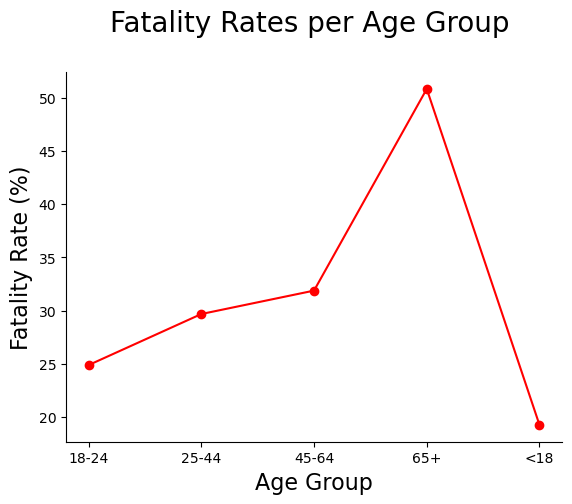

In [14]:
plt.scatter(pct_deceased.keys(), pct_deceased, color= 'r')
x_sort = np.sort(pct_deceased.keys(),)
y_sort = pct_deceased[np.argsort(pct_deceased.keys(),)]

plt.plot(x_sort, y_sort, color='r')
plt.title('Fatality Rates per Age Group \n', fontsize=20)
plt.xlabel('Age Group', fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel('Fatality Rate (%)', fontsize=16)

As clearly displayed, it is true that older age groups have a higher percentage deceased from shootings and are indeed at a higher risk of death by shooting. This is seen by the spike in percentage deceased that happens with age group 65+. 

## Conlusion

In my exploration of shooting incidents in New York city, I discovered three main hypotheses/questions:

1. Has COVID-19 caused shooting incidents to increase between years 2019 - 2022 as funding was increased to fight the pandemic rather than funding policing?

2. The Bronx is notoriously known to have the highest crime rates, however is it true that the most shootings occur there?


3. The police department in New York City keeps records of how old the victims are. Is it true that victims of a higher age group are more at risk to be deceased by shootings?

For the first hypothesis, I analyzed that there was an increase in shootings per year and  plotted a regression line to help extrapolate that data and understand the average rate of that increase. 

For the second hypothesis, I created a bar chart that displays the total number of shootings in each neighberhood/borough. Through that visualization we saw that the most shootings occur in Brooklyn, even though the highest overall crime rate is the most in the Bronx. 

For the last hypothesis, I created a Series that displayed the percentage of victims who have been deceseased by shootings in each age group. From that I plotted a line graph that shows the percentages of death with each age group. That visualization displayed that at a higher age group, the risk of being killed by a shooting incident is much higher than that of lower age groups. 